<a href="https://colab.research.google.com/github/simardeepsinghsandhu/maskrcnn-using-mmdetection-on-self-annotated-thermal-dog-person-dataset/blob/main/mmdetectionfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 1.2 kB/s 
     |████████████████████████████████| 6.6 MB 49.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.5.1+cu101 which is incompatible.
     |████████████████████████████████| 352 kB 8.0 MB/s 
     |████████████████████████████████| 313 kB 14.6 MB/s 
     |████████████████████████████████| 185 kB 17.1 MB/s 
  Created whe

In [2]:
ls

mmdetection/  sample_data/


In [3]:
cd mmdetection/

/content/mmdetection


In [4]:
!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Obtaining file:///content/mmdetection
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-_gt5kn4t/panopticapi_7f526d41ea15458887e5c7218e9f24d0
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-install-_gt5kn4t/panopticapi_7f526d41ea15458887e5c7218e9f24d0
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8307 sha256=195407a073afd9e996189a6553e93e026fc8113f4aef4b3b8b8790c647a1c945
  Stored in directory: /tmp/pip-ephem-wheel-cache-v63686k5/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15355 sha256=f57f6ba3474782cf8013a21a43e1ac795e89edd8bab0fd389a4b706915ad7873
  Stored in directory: /root/.cache/pip/wheels/ba/ad/c8/2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built panopticapi terminaltables
  Running setup.py develop for mmdet
     |████████████████████████████████| 2.1

In [1]:
ls

mmdetection/  sample_data/


In [2]:
cd mmdetection/

/content/mmdetection


In [3]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.14.0
11.0
GCC 7.5


In [4]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


--2021-07-31 10:01:32--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  11.2MB/s    in 17s     

2021-07-31 10:01:50 (10.2 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



In [5]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

/content/mmdetection/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [6]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


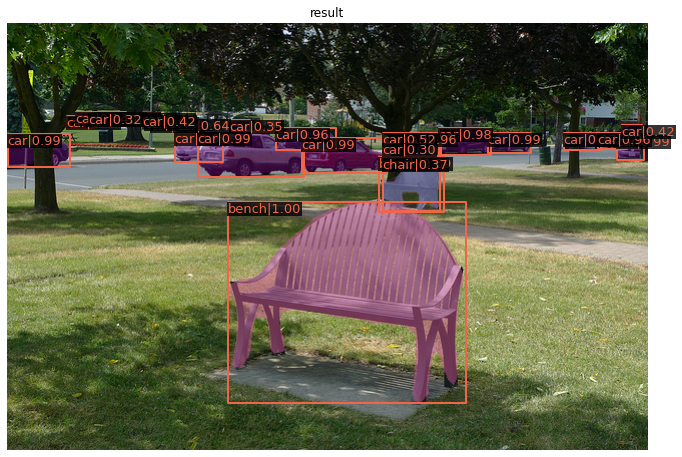

In [7]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

In [8]:
ls

checkpoints/  docs_zh-CN/      model-index.yml  requirements.txt  tools/
configs/      LICENSE          pytest.ini       resources/
demo/         MANIFEST.in      README.md        setup.cfg
docker/       mmdet/           README_zh-CN.md  setup.py*
docs/         mmdet.egg-info/  requirements/    tests/


In [9]:
!mkdir data/
!mkdir data/coco/
!mkdir data/coco/train2017/
!mkdir data/coco/val2017/
!mkdir data/coco/test2017/
!mkdir data/coco/annotations

In [10]:
ls

checkpoints/  docs/        mmdet.egg-info/  requirements/     tests/
configs/      docs_zh-CN/  model-index.yml  requirements.txt  tools/
data/         LICENSE      pytest.ini       resources/
demo/         MANIFEST.in  README.md        setup.cfg
docker/       mmdet/       README_zh-CN.md  setup.py*


In [11]:
!python tools/train.py /content/mmdetection/configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py

2021-07-31 10:11:44,507 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.11 (default, Jul  3 2021, 18:01:19) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.5.1+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75

In [12]:
!python tools/test.py /content/mmdetection/configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py 

usage: test.py [-h] [--work-dir WORK_DIR] [--out OUT] [--fuse-conv-bn]
               [--format-only] [--eval EVAL [EVAL ...]] [--show]
               [--show-dir SHOW_DIR] [--show-score-thr SHOW_SCORE_THR]
               [--gpu-collect] [--tmpdir TMPDIR]
               [--cfg-options CFG_OPTIONS [CFG_OPTIONS ...]]
               [--options OPTIONS [OPTIONS ...]]
               [--eval-options EVAL_OPTIONS [EVAL_OPTIONS ...]]
               [--launcher {none,pytorch,slurm,mpi}] [--local_rank LOCAL_RANK]
               config checkpoint
test.py: error: the following arguments are required: checkpoint


In [14]:
!python tools/test.py /content/mmdetection/configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py /content/mmdetection/work_dirs/mask_rcnn_r50_fpn_1x_coco/latest.pth --eval bbox segm


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/content/mmdetection/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
[                                                  ] 0/32, elapsed: 0s, ETA:/content/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
[>>] 32/32, 9.4 task/s, elapsed: 3s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index cr

In [15]:
!python tools/test.py /content/mmdetection/configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py /content/mmdetection/work_dirs/mask_rcnn_r50_fpn_1x_coco/latest.pth --eval bbox segm --show-dir '/content/predictions/'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/content/mmdetection/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
[                                                  ] 0/32, elapsed: 0s, ETA:/content/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
[>>] 32/32, 5.1 task/s, elapsed: 6s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index cr